<header style="background-color: #fff; position: fixed; width: 100%; z-index: 1; top: -10px;"><p><br></p>
           <p   style="color: #17318F;font-family:Lucida Sans Unicode, Lucida Grande, sans-serif;font-size:40px" align="center"> Métodos de clasificación supervisada      PARTE I
 <a href='https://izainea.github.io'><img src="https://raw.githubusercontent.com/Izainea/Izainea.github.io/master/logos%20IZ-13.png" alt="izainea" style="margin: 10px;  float: right; width: 150px;" ></a></p> 
<p><br></p>
</header>

# Análisis discriminante

Es un método de clasificación supervisada que discrimina según las características de entrada. En este apartado revisaremos la discriminación lineal y cuadrática que hace serparaciones creando superficies de decisión lineal y cuadrática, respectivamente. Un elemento interesante es el uso del terema de Bayes para determinar la probabilidad de que pertenezca a alguna de las clases.

Cuando nos referimos al método del análisis discriminante lineal podemos pensar que es muy similar a la regresión logística, sin embargo, cuando la variable objetivo tiene más de dos categorias funciona mejor que RL, pues si las clases están muy separadas, los parámetros estimados en el modelo de regresión son inestables mientras que el análisis discriminante lineal (LDA, por sus siglas en inglés) no muestra complicaciones. 

Además, si el número de observaciones es bajo y la distribución de los predictores es aproximadamente normal en cada una de las clases, LDA es más estable que la regresión logística. No obstante si el análisis discriminante se aplica en un caso bivariado tendremos resultados similares.

**Supuestos y restricciones**

* LAs variables predictoras, de entrada o discriminantes (como quieran llamarlas) deben ser cuantitativas.
* El número de variables discriminantes debe ser menor que el número de registros menos 2. $(p<n-2)$ 
* No colinealidad
* Las matrices de covarianzas de cada grupo deben ser aproximadamente iguales (normalizar), si esto no se cumple puede seguir al cuadrático.
* Las variables continuas deben serguir una distribución normal multivariante, (aunque hay referencias que muestran un buen resultado a pesar de no tener esta distribución).

## Idea intuitiva del algoritmo (Tomado de [cienciadedatos.net](https://www.cienciadedatos.net/documentos/28_linear_discriminant_analysis_lda_y_quadratic_discriminant_analysis_qda#Idea_intuitiva))

* Disponer de un conjunto de datos de entrenamiento (training data) en el que se conoce a que grupo pertenece cada observación.
* Calcular las probabilidades previas (prior probabilities): la proporción esperada de observaciones que pertenecen a cada grupo.
* Determinar si la varianza o matriz de covarianzas es homogénea en todos los grupos. De esto dependerá que se emplee LDA o QDA.
* Estimar los parámetros necesarios para las funciones de probabilidad condicional, verificando que se cumplen las condiciones para hacerlo.
* Calcular el resultado de la función discriminante. El resultado de esta determina a qué grupo se asigna cada observación.
* Utilizar métodos de validación para estimar la eficiencia del clasificador.




## Planteamiento del problema Bayesiano de decisión (considerando observaciones a priori)

* Como mencionamos antes, debemos conocer las  probabilidades a priori de que un individuo pertenezca a un grupo, estas probabilidades las notamos $\pi_k$ y hace referencia a la probabilidad de que la observación pertenezca a $k$.

* Requerimos la función de densidad de probabilidad condicional de $X$ para una observación que pertenece a $k$, $f_k(X)=P(X=x|Y=k)$. 

* La probabilidad a posteriori resulta ser la que nos interesa, indica cual es la probabilidad de que Y=k, dado que X=x. Es decir, $P(Y=k|X=x)$.

...  y solito solo entra el teorema de Bayes ...

$$P(Y=k|X=x)=\cfrac{P(X=x|Y=k)\cdot \pi_k}{\sum_{j=1}^{K}\pi_jP(X=x|Y=j)}$$
 

La clasificación con menor error (clasificación de Bayes) se consigue asignando la observación a aquel grupo que maximice la probabilidad a posteriori, es decir, se asignará cada observación a aquel grupo para el que $\pi_k P(X=x|Y=k)$ sea mayor.

### Discriminante lineal

Observe que necesitamos la probabilidad poblacional de que una observación cualquiera pertenezca a cada clase $(\pi_k)$ y la probabilidad poblacional de que una observación que pertenece a la clase $k$ adquiera el valor $x$ en el predictor, ($P(X=x|Y=k)$), usamos la muestra para estimar esta información:

$$ \pi_k=\cfrac{n_k}{k},$$
$$P(Y = k | X = x) = \frac{1}{\sqrt{2\pi\sigma_k}} \cdot exp(-\frac{1}{2\sigma^{2}_{k}}(x-\mu_k)^2). $$

Donde $n_x$ es la cantidad de elementos en la clase $k$  y $\mu_k$ y $\sigma_k$  son la media y la varianza para la clase $k$. Si la varianza es la misma en todos los datos tenemos:

$$P( Y = k | X = x) = \frac{\pi_k \frac{1}{\sqrt{2\pi\sigma}} \cdot exp(-\frac{1}{2\sigma^{2}}(x-\mu_k)^2)}{\sum_{j=1}^K\pi_j \frac{1}{\sqrt{2\pi\sigma}} \cdot exp(-\frac{1}{2\sigma^{2}}(x-\mu_j)^2)},$$

finalmente aplicando logaritmo:
$$log(P( Y = k | X = x) ) =  x \cdot \frac{\mu_k}{\sigma^2} - \frac{\mu^2_{k}}{2\sigma^2} + log(\pi_k).$$

El término lineal en el nombre Análisis discriminante lineal se debe al hecho de que la función discriminatoria es lineal respecto de $x$.

En la práctica, a pesar de tener una certeza considerable de que $X$ se distribuye de forma normal dentro de cada clase, los valores $\mu_1, \cdots,\mu_k$, $\pi_1,\cdots,\pi_k$ y $\sigma_2$ se desconocen, por lo que tienen que ser estimados a partir de las observaciones. Las estimaciones empleadas en LDA son:

$$\hat{\mu}_k = \frac{1}{n_k}\sum_{i; y_i=k}x_i \text{ y }$$
$$\hat{\sigma}_k = \frac{1}{N-K}\sum_{k=1}^K\sum_{i; y_i=k}(x_i-\hat{\mu}_k)^2.$$

La clasificación de Bayes consiste en asignar cada observación $X = x$ a aquella clase para la que $P(Y=k|X=x)$ sea mayor.

### Discriminante cuadrático (cada clase tiene su matriz de covarianza)

El clasificador cuadrático (QDA por sus siglas en inglés) se asemeja en gran medida al LDA, con la única diferencia de que el QDA considera que cada clase k tiene su propia matriz de covarianza $(\Sigma_k)$ y, como consecuencia, la función discriminante toma forma cuadrática:

$$log(P( Y = k | X = x))= -\frac{1}{2}\text{log}|\Sigma_k|-\frac{1}{2}(x-\mu_{k})^{T}\Sigma_{k}^{-1}(x-\mu_{k})+\text{log}(\pi_k)$$

Para poder calcular la posterior probability a partir de esta ecuación discriminante es necesario estimar, para cada clase, $\Sigma_k, \mu_k$ y $\pi_k$ a partir de la muestra. Cada nueva observación se clasifica en aquella clase para la que el valor de la probabilidad a posteriori sea mayor.

QDA genera límites de decisión curvos por lo que puede aplicarse a situaciones en las que la separación entre grupos no es lineal.

## Implementación de LDA en Python (Tomado de [scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html))

Este ejemplo traza los elipsoides de covarianza de cada clase y límite de decisión aprendido por LDA y QDA. Los elipsoides muestran la desviación estándar doble para cada clase. Con LDA, la desviación estándar es la misma para todas las clases, mientras que cada clase tiene su propia desviación estándar con QDA.

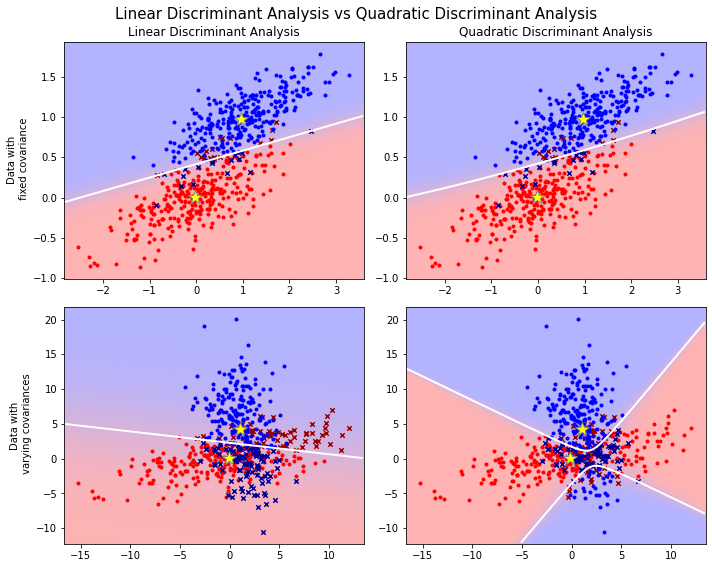

In [12]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0,shading='auto')
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
    
    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='black', linewidth=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())
    


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')
    


plt.figure(figsize=(10, 8), facecolor='white')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis',
             y=0.98, fontsize=15)
for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    #plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    #plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.tight_layout()
plt.subplots_adjust(top=0.92)

plt.show()

## Análisis discriminante lineal para reducción dimensional

El conjunto de datos de Iris representa 3 tipos de flores de Iris (Setosa, Versicolour y Virginica) con 4 atributos: longitud del sépalo, ancho del sépalo, largo del pétalo y ancho del pétalo.

El análisis de componentes principales (PCA) aplicado a estos datos identifica la combinación de atributos (componentes principales o direcciones en el espacio de características) que representan la mayor variación en los datos. Aquí graficamos las diferentes muestras en los 2 primeros componentes principales.

El análisis discriminante lineal (LDA) intenta identificar los atributos que explican la mayor variación entre clases . En particular, LDA, a diferencia de PCA, es un método supervisado que utiliza etiquetas de clase conocidas.

explained variance ratio (first two components): [0.92461872 0.05306648]


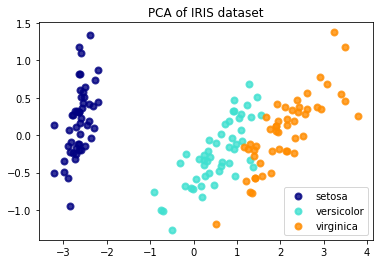

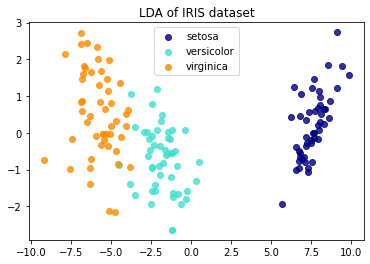

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

# Clasificador ingenuo de Bayes

Los métodos de clasificación de Bayes hacen referencia a una collección de métodos de clasificación supervisada basados en la aplicación del teorema de Bayes, en estos métosos se supone de manera ingenua que hay independencia condicional entre las diferentes características según la clase. Como vimos arriba, a partir del teorema de Bayes podemos afirmar que:

$$ P (y \mid x_1, \dots, x_n) = \frac {P (y) P (x_1, \dots, x_n \mid y)} {P (x_1, \dots, x_n)}$$

Si asumimos *'ingenuamente'* lo siguiente:

$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y),$$

tenemos:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}$$
                                 
Dado que $P(x_1,\cdots,x_n)$ es constante dada la entrada, podemos usar la siguiente regla de clasificación:

$$ \begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align}$$

y podemos usar la estimación máxima a posteriori (MAP) para determinar $P(y)$ y $P(x_i|y)$, $P(y)$ resulta ser una proporción y según como calculemos $P(x_i|y)$ tendremos los diferentes clasificadores de Bayes.

ver [H. Zhang (2004). The optimality of Naive Bayes. Proc. FLAIRS.](https://www.cs.unb.ca/~hzhang/publications/FLAIRS04ZhangH.pdf)

## Clasificador ingenuo de Bayes Gaussiano

En este caso 

$$ P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$ 

$\sigma_y$ y $\mu_y$ son estimados a partir de máxima verosimilitud.

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


## Clasificador ingenuo de Bayes Multinomial


Implementa el algoritmo ingenuo de Bayes para datos distribuidos multinomialmente, y es una de las dos variantes clásicas de Bayes ingenuo que se utilizan en la clasificación de texto (donde los datos se representan normalmente como recuentos de vectores de palabras, aunque también se sabe que los vectores tf-idf funcionan bien en la práctica). 

$$P(x_i \mid y)=\hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n}$$

donde $N_{yi} = \sum_{x \in T} x_i$ es el número de veces que aparece la característica $i$ en una muestra de la clase $y$ en el set de entrenamiento $T$ y $N_{y} = \sum_{i=1}^{n} N_{yi}$.

El parametro que se usan de suavisado es $\alpha \geq 0$ tiene en cuenta las características que no están presentes en las muestras de aprendizaje y evita probabilidades cero en cálculos posteriores. Fijando $\alpha=1$ tenemos un suavizado de Laplace, mientras que para $\alpha<1$ tenemos un suavizado de Lidstone.

## Complemento del clasificador ingenuo de Bayes

Implementa el algoritmo de complemento ingenuo de Bayes (CNB). CNB es una adaptación del algoritmo estándar multinomial ingenuo de Bayes (MNB) que es particularmente adecuado para conjuntos de datos desequilibrados. Específicamente, CNB usa estadísticas del complemento de cada clase para calcular los pesos del modelo. Los inventores de CNB muestran empíricamente que las estimaciones de parámetros para CNB son más estables que las de MNB. Además, CNB supera regularmente a MNB (a menudo por un margen considerable) en las tareas de clasificación de texto. El procedimiento para calcular los pesos es el siguiente:

$$ \begin{align}\begin{aligned}\hat{\theta}_{ci} = \frac{\alpha_i + \sum_{j:y_j \neq c} d_{ij}}
                         {\alpha + \sum_{j:y_j \neq c} \sum_{k} d_{kj}}\\w_{ci} = \log \hat{\theta}_{ci}\\w_{ci} = \frac{w_{ci}}{\sum_{j} |w_{cj}|}\end{aligned}\end{align}$$ 
                         
donde las sumas están sobre todos los documentos $j$  que no están en la clase $c$ , $d_{ij}$ es el recuento o el valor tf-idf del término $i$ en el documento $j$, $\alpha_i$ es un hiperparámetro de suavizado como el que se encuentra en MNB, y $\alpha = \sum_{i} \alpha_i$. La segunda normalización aborda la tendencia de los documentos más largos a dominar las estimaciones de parámetros en MNB. La regla de clasificación es:

$$ \hat{c} = \arg\min_c \sum_{i} t_i w_{ci}$$

es decir, se asigna un documento a la clase que es la coincidencia de complemento más pobre .

## Clasificador ingenuo de Bayes Bernoulli

Implementa los algoritmos ingenuos de clasificación y entrenamiento de Bayes para los datos que se distribuyen de acuerdo con distribuciones de Bernoulli multivariadas; es decir, puede haber varias características, pero se supone que cada una es una variable de valor binario (Bernoulli, booleano). Por lo tanto, esta clase requiere que las muestras se representen como vectores de características con valores binarios; si se le entrega cualquier otro tipo de datos, una BernoulliNBinstancia puede binarizar su entrada (dependiendo del parámetro binario).

La regla de decisión para el ingenuo Bayes de Bernoulli se basa en

$$P(x_i \mid y) = P(i \mid y) x_i + (1 - P(i \mid y)) (1 - x_i)$$

que difiere de la regla multinomial de NB en que penaliza explícitamente la no ocurrencia de una característica $i$ eso es un indicador de la clase $y$, donde la variante multinomial simplemente ignoraría una característica que no ocurre.

En el caso de la clasificación de texto, se pueden usar vectores de ocurrencia de palabras (en lugar de vectores de conteo de palabras) para entrenar y usar este clasificador. BernoulliNB podría funcionar mejor en algunos conjuntos de datos, especialmente aquellos con documentos más cortos. Es aconsejable evaluar ambos modelos, si el tiempo lo permite.

## Clasificador ingenuo de Bayes Categórico

implementa el algoritmo de Bayes ingenuo categórico para datos distribuidos categóricamente. Asume que cada característica $i$, que es descrita por el índice, tiene su propia distribución categórica.

Para cada característica $i$ en el set de entrenamiento $X$, CategoricalNB estima una distribución categórica para cada característica i de X condicionada a la clase y. El conjunto de índices de las muestras se define como $J = \{ 1, \dots, m \}$ , con $m$ el número de muestras.


La probabilidad de la categoría $t$ en característica $I$ de la clase dada $c$ se estima como:

$$P(x_i = t \mid y = c \: ;\, \alpha) = \frac{ N_{tic} + \alpha}{N_{c} + \alpha n_i},$$


CategoricalNB asume que la matriz de la muestra $X$ está codificado (por ejemplo, con la ayuda de OrdinalEncoder) de modo que todas las categorías para cada característica están representados con números $0,1,\cdots, n_i-1$ dónde $n_i$ es el número de categorías de funciones disponibles $i$.